<a href="https://colab.research.google.com/github/juanitarodeloo/IntroMachineLearning/blob/main/Ass1_SYSC4415_W24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overall Instructions:

Please print out values when asked for using python's print() function.
As soon as I open your assignment, I will click "runtime" → "run all". Ensure your notebook displays all answers when this is clicked.

For text answers, like explanations, you can put your answer in comments or in print statements.

## Section 1: Gradients

In [2]:
"""
Q1a (1 mark)
Calculate the gradient of the function: f(x, y, z) = 7z(x^2) – 6x(y^3) + 9z at (-10, 0, 2)
"""

#calculate derivative of the function
x = -10
y = 0
z = 2

df_dx = 14*z*x - 6*y**3
df_dy = -18*x*y**2
df_dz = 7*x**2 + 9

# YOUR ANSWER HERE (text only)
print("Gradient at (-10, 0, 2):", (df_dx, df_dy, df_dz))

Gradient at (-10, 0, 2): (-280, 0, 709)


In [5]:
"""
Q1b (1 mark)
What does the gradient you calculated above represent?
"""

print("The gradient indicates the direction in which the function: f(x, y, z) = 7z(x^2) – 6x(y^3) + 9z is the most steep at the point (-10, 0, 2)." +
      " Each component of the gradient corresponds to the rate of change of the function with respect to one of the variables x, y, z.  Therefore, " +
      "it represents the direction and rate of chance of the function at the given point. ")

The gradient indicates the direction in which the function: f(x, y, z) = 7z(x^2) – 6x(y^3) + 9z is the most steep at the point (-10, 0, 2). Each component of the gradient corresponds to the rate of change of the function with respect to one of the variables x, y, z.  Therefore, it represents the direction and rate of chance of the function at the given point. 


In [9]:
"""
Q1c (2 marks)
Verify your answer to Q1a numerically.
Specifically, write a function that estimates the partial derivatives of the function with respect to the inputs x, y, and z.
Do this by adding a small perturbation to the input (one input at a time) and observing the change in the value of the function.
"""
def f(x, y, z):
    return 7*z*x**2 - 6*x*y**3 + 9*z

def partial_derivative_x(x, y, z, h=1e-2):
    return (f(x + h, y, z) - f(x, y, z)) / h

def partial_derivative_y(x, y, z, h=1e-2):
    return (f(x, y + h, z) - f(x, y, z)) / h

def partial_derivative_z(x, y, z, h=1e-2):
    return (f(x, y, z + h) - f(x, y, z)) / h

# Given point
x = -10
y = 0
z = 2

# Estimate partial derivatives
df_dx = partial_derivative_x(x, y, z)
df_dy = partial_derivative_y(x, y, z)
df_dz = partial_derivative_z(x, y, z)

print("Estimated partial derivative with respect to x:", df_dx)
print("Estimated partial derivative with respect to y:", df_dy)
print("Estimated partial derivative with respect to z:", df_dz)


Estimated partial derivative with respect to x: -279.86000000000786
Estimated partial derivative with respect to y: 0.006000000007588824
Estimated partial derivative with respect to z: 708.9999999999691


## Section 2: Develop a Model

In [14]:
"""
Q2a (1 mark)
Use scikit-learn to load in the Breast Cancer Wisconsin (Diagnostic) dataset.
Scikit-learn has this dataset in its toy datasets: https://scikit-learn.org/stable/datasets/toy_dataset.html
Create a variable that contains the features and another variable that contains the labels. In the tutorials we did exactly this, but for the wine dataset.
"""
from sklearn.datasets import load_breast_cancer
import numpy as np

# Load Breast Cancer Wisconsin (Diagnostic) dataset
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

print("Features shape:", X.shape) #num of samples is the first index
print("Labels shape:", y.shape)


Features shape: (569, 30)
Labels shape: (569,)


In [15]:
"""
Q2b (1 mark)

For the data you loaded in Q2a, use scikit-learn's train_test_split functon to create a training set, a validation set, and a test set.
The training set should be 20% of the data, the validation set should be 40% of the data, and the test set should be 40% of the data.
IMPORTANT: use random_seed=42 when splitting the data.
Print out the shapes of the training set, validation set, test set arrays.
"""
from sklearn.model_selection import train_test_split

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (113, 30)
Validation set shape: (228, 30)
Test set shape: (228, 30)


In [ ]:
"""
Q2c (1 mark)
Normalize the features (of the breast cancer data) such that the training set has mean 0 and standard deviation 1.
Also normalize the validation set and the test set---but using the statistics (mean and std) from the training set.
Print out the mean and standard deviation of the features in each split.
"""
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print("Training Set Mean: " , X_train.mean(axis=0) , ", Standard Deviation: " , X_train.std(axis=0))
print("Validation Set Mean: " , X_val.mean(axis=0) , ", Standard Deviation: " , X_val.std(axis=0))
print("Standard Deviation: " , X_test.mean(axis=0) , ", Standard Deviation: " ,  X_test.std(axis=0))

In [35]:
"""
Q2d (3 marks)
Use the training set, prepared in Q2c, to train the following models:

1. Scikit-learn's DecisionTreeClassifier with max_depth=1
2. Scikit-learn's DecisionTreeClassifier with max_depth=2
3. Scikit-learn's DecisionTreeClassifier with max_depth=3
4. Scikit-learn's DecisionTreeClassifier with max_depth=4
5. Scikit-learn's DecisionTreeClassifier with max_depth=5
6. Scikit-learn's DecisionTreeClassifier with max_depth=50
7. Scikit-learn's SVC with a 'linear' kernel
8. Scikit-learn's SVC with a 'rbf' kernel
9. Scikit-learn's SVC with a 'poly' kernel

Other than the specified hyper-parameters (i.e., max_depth and kernel type) use default hyper-parameters by not providing them as arguments.

If the algorithm receives random_seed as an argument, always choose random_seed=42; otherwise you may get different results from me!
For each of the 9 models, print out the overall accuracy on the training set and validation set.
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# 1. Scikit-learn's DecisionTreeClassifier with max_depth=1
clf = DecisionTreeClassifier(max_depth=1, random_state=42)
clf = clf.fit(X_train, y_train) # train the DecisionTreeClassifier on the training set

train_predictions = clf.predict(X_train) # predict on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training set accuracy for a tree with max_depth = 1:", train_accuracy)

val_predictions = clf.predict(X_val) # predict on the validation set
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation set accuracy for a tree with max_depth = 1:", val_accuracy, "\n")

# 2. Scikit-learn's DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf = clf.fit(X_train, y_train) # train the DecisionTreeClassifier on the training set

train_predictions = clf.predict(X_train) # predict on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training set accuracy for a tree with max_depth = 2:", train_accuracy)

val_predictions = clf.predict(X_val) # predict on the validation set
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation set accuracy for a tree with max_depth = 2:", val_accuracy, "\n")

# 3. Scikit-learn's DecisionTreeClassifier with max_depth=3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf = clf.fit(X_train, y_train) # train the DecisionTreeClassifier on the training set

train_predictions = clf.predict(X_train) # predict on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training set accuracy for a tree with max_depth = 3:", train_accuracy)

val_predictions = clf.predict(X_val) # predict on the validation set
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation set accuracy for a tree with max_depth = 3:", val_accuracy, "\n")

# 4. Scikit-learn's DecisionTreeClassifier with max_depth=4
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf = clf.fit(X_train, y_train) # train the DecisionTreeClassifier on the training set

train_predictions = clf.predict(X_train) # predict on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training set accuracy for a tree with max_depth = 4:", train_accuracy)

val_predictions = clf.predict(X_val) # predict on the validation set
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation set accuracy for a tree with max_depth = 4:", val_accuracy, "\n")

# 5. Scikit-learn's DecisionTreeClassifier with max_depth=5
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf = clf.fit(X_train, y_train) # train the DecisionTreeClassifier on the training set

train_predictions = clf.predict(X_train) # predict on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training set accuracy for a tree with max_depth = 5:", train_accuracy)

val_predictions = clf.predict(X_val) # predict on the validation set
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation set accuracy for a tree with max_depth = 5:", val_accuracy, "\n")

# 6. Scikit-learn's DecisionTreeClassifier with max_depth=50
clf = DecisionTreeClassifier(max_depth=50, random_state=42)
clf = clf.fit(X_train, y_train) # train the DecisionTreeClassifier on the training set

train_predictions = clf.predict(X_train) # predict on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training set accuracy for a tree with max_depth = 50:", train_accuracy)

val_predictions = clf.predict(X_val) # predict on the validation set
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation set accuracy for a tree with max_depth = 50:", val_accuracy, "\n")

# 7. Scikit-learn's SVC with a 'linear' kernel
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train) # train SVM

y_val_pred = svm.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred) # validate model
print(f"SVC linear kernel Validation Accuracy: {val_accuracy}")

y_test_pred = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred) # test the model
print(f"SVC linear kernel Test Accuracy: {test_accuracy}", "\n")

# 8. Scikit-learn's SVC with a 'rbf' kernel
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

y_val_pred = svm.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred) # validate model
print(f"SVC rbf kernel Validation Accuracy: {val_accuracy}")

y_test_pred = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred) # Test the model
print(f"SVC rbf kernel Test Accuracy: {test_accuracy}", "\n")

# 9. Scikit-learn's SVC with a 'poly' kernel
svm = SVC(kernel='poly', random_state=42)
svm.fit(X_train, y_train)

y_val_pred = svm.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred) # validate model
print(f"SVC poly kernel Validation Accuracy: {val_accuracy}")

y_test_pred = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred) # Test the model
print(f"SVC poly kernel Test Accuracy: {test_accuracy}", "\n")




Training set accuracy for a tree with max_depth = 1: 0.9469026548672567
Validation set accuracy for a tree with max_depth = 1: 0.9035087719298246 

Training set accuracy for a tree with max_depth = 2: 0.9646017699115044
Validation set accuracy for a tree with max_depth = 2: 0.881578947368421 

Training set accuracy for a tree with max_depth = 3: 0.9823008849557522
Validation set accuracy for a tree with max_depth = 3: 0.8771929824561403 

Training set accuracy for a tree with max_depth = 4: 0.9911504424778761
Validation set accuracy for a tree with max_depth = 4: 0.8640350877192983 

Training set accuracy for a tree with max_depth = 5: 1.0
Validation set accuracy for a tree with max_depth = 5: 0.8728070175438597 

Training set accuracy for a tree with max_depth = 50: 1.0
Validation set accuracy for a tree with max_depth = 50: 0.8728070175438597 

SVC linear kernel Validation Accuracy: 0.9692982456140351
SVC linear kernel Test Accuracy: 0.9692982456140351 

SVC rbf kernel Validation Acc

In [36]:
"""
Q2e (1 mark)
Based on your results in Q2d, is the data linearly separable? Very briefly explain.
"""

print("Based on the results from the previous question, I believe the data is linearly seperable because the SVC with a linear kernel achieves a high accuracy and the decision tree with low depths perform well, " +
      "suggesting it is linearly seperable.")

Based on the results from the previous question, I believe the data is linearly seperable because the SVC with a linear kernel achieves a high accuracy and the decision tree with low depths perform well, suggesting it is linearly seperable.


In [ ]:
"""
Q2f (1 mark)
If your only selection criteria were the overall accuracy, which model would you choose?
Briefly explain your choice. (Hint: remember the roles of train, validation, and test sets.)
"""

print("Since the performance of the validation set represents how well the model will perform on new, unseen data, it is more important the the accuracy of it is high. " +
      "Based on the accuracies, the SVC with a linear kernel has the highest validation set accuracy therefore I would choose this model.")

In [43]:
"""
Q2g (1 mark)
A woman is told by her doctor that, according to this ML model you developed, she has breast cancer.
Use the test set to estimate the probability that she actually has breast cancer.
"""

svm = SVC(kernel='linear', probability = True, random_state=42)
svm.fit(X_train, y_train) # train SVM

test_probabilities = svm.predict_proba(X_test) # computes probabilities of possible outcomes for samples in X
positive_class_index = svm.classes_.tolist().index(1) # gets the index of the positive class (malignant tumours)
probabilities_positive_class = test_probabilities[:, positive_class_index] # extracts the probabibility of the positive class
estimated_probability = probabilities_positive_class.mean()
estimated_probability_perc = round(estimated_probability * 100)

print("The estimated probabibility that the woman actually has breast cancer is about: " , estimated_probability_perc, "%")

The estimated probabibility that the woman actually has breast cancer is about:  62 %


## Question 3: Decision Trees

Training set accuracy for a tree with max_depth = 100, random_state=42:  1.0
Validation set accuracy for a tree with max_depth = 100, random_state=42:  0.8728070175438597 



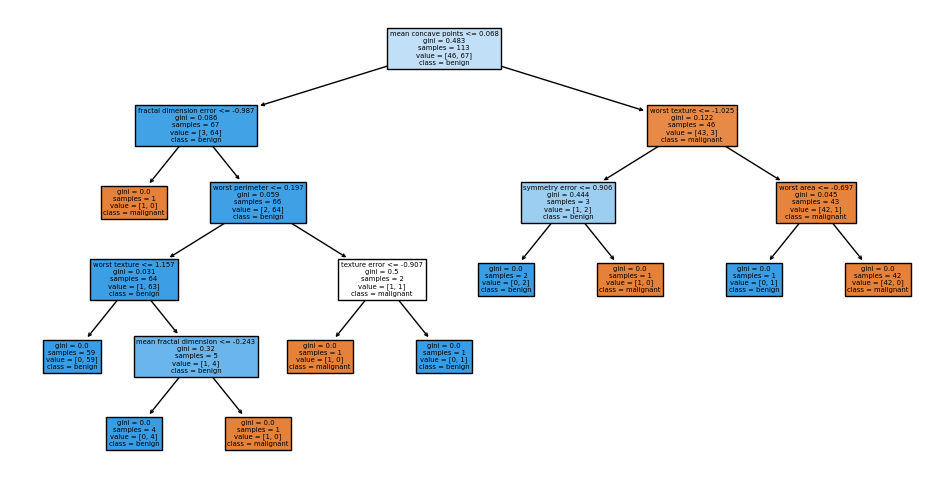

Training set accuracy for a tree with max_depth = 100, splitter='random', random_state=42:  1.0
Validation set accuracy for a tree with max_depth = 100, splitter='random', random_state=42:  0.8903508771929824 



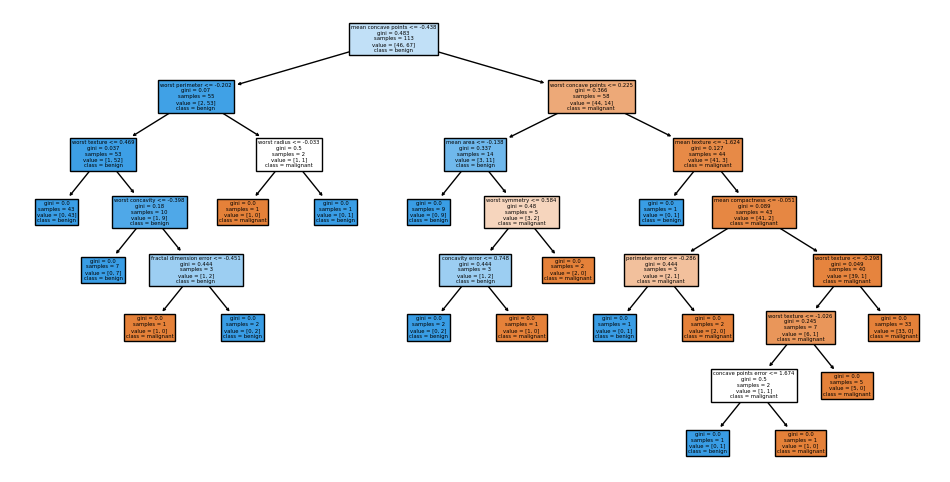

In [50]:
"""
Q3 (2 marks)
Train two decision trees using scikit-learn on the breast cancer training data you prepared in Q2c:
1. DecisionTreeClassifier(max_depth=100, random_state=42)
2. DecisionTreeClassifier(max_depth=100, splitter='random', random_state=42)

Print out the training and validation overall accuracies for each model.
Visualize the trees using sklearn's plot_tree(model) function.

Briefly discuss the differences between the two trees and relate this difference with their ability to generalize.
"""
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train the DecisionTreeClassifier(max_depth=100, random_state=42)
tree1 = DecisionTreeClassifier(max_depth=100, random_state=42)
tree1.fit(X_train, y_train)

train_predictions = tree1.predict(X_train) # predict on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training set accuracy for a tree with max_depth = 100, random_state=42: ", train_accuracy)

val_predictions = tree1.predict(X_val) # predict on the validation set
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation set accuracy for a tree with max_depth = 100, random_state=42: ", val_accuracy, "\n")

# visualize the tree
plt.figure(figsize=(12, 6))
plot_tree(tree1, filled=True, feature_names=cancer_data.feature_names, class_names=cancer_data.target_names)
plt.show()

# Train the DecisionTreeClassifier(max_depth=100, splitter='random', random_state=42)
tree2 = DecisionTreeClassifier(max_depth=100, splitter='random', random_state=42)
tree2.fit(X_train, y_train)

train_predictions = tree2.predict(X_train) # predict on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training set accuracy for a tree with max_depth = 100, splitter='random', random_state=42: ", train_accuracy)

val_predictions = tree2.predict(X_val) # predict on the validation set
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation set accuracy for a tree with max_depth = 100, splitter='random', random_state=42: ", val_accuracy, "\n")
# visualize the tree
plt.figure(figsize=(12, 6))
plot_tree(tree2, filled=True, feature_names=cancer_data.feature_names, class_names=cancer_data.target_names)
plt.show()

print("The first tree with max_depth = 100 using the default splitter splits the tree based on the features that provide the best information gain, " +
    "using the Gini impurity method or entropy criteria. These tend to create more structured splits based on the importance of features in seperating the classes. " +
      "The second tree with max_depth = 100 using the random splitter splits the tree randomly and selects the best thresholds among a random subset of the features. " +
      "This randomness could help prevent overfitting by creating more diverse trees. As we can see, the second tree is in fact deeper and it's accuracy on the validation set is larger, " +
      "suggesting the random splitter helps in generlization. This makes sense because introducing randomness can result in different features being used at each node, as opposed to always choosing " +
      "the best one. They deal with noise and outliers better since it doesn't rely heavily on any single feature or decision path.")
